In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
car_df = pd.read_csv('Cardetails.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### EDA

In [6]:
car_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
car_df.dropna(how='any',inplace=True)

In [8]:
car_df.duplicated().sum()

1189

In [9]:
car_df.drop_duplicates(keep='first',inplace=True)

In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


### ['name']

In [11]:
car_df.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [12]:
car_df.name.value_counts()

name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Alto K10 VXI                              47
                                               ... 
BMW X7 xDrive 30d DPE                             1
Skoda Superb Elegance 1.8 TSI AT                  1
Skoda Fabia 1.2 TDI Ambition Plus                 1
Skoda Rapid 1.6 MPI AT Ambition BSIV              1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: count, Length: 1982, dtype: int64

In [13]:
# Here car name is too much large so I decided to keep only first two string
# Extracting first two words from the 'name' column
car_df['name'] = car_df['name'].apply(lambda carname: ' '.join(carname.split()[:1]))

In [14]:
car_df['name'] = car_df['name'].str.lower()

In [15]:
car_df['name']

0        maruti
1         skoda
2         honda
3       hyundai
4        maruti
         ...   
8121     maruti
8122    hyundai
8123    hyundai
8124    hyundai
8125     maruti
Name: name, Length: 6717, dtype: object

In [16]:
car_df['name'].unique()

array(['maruti', 'skoda', 'honda', 'hyundai', 'toyota', 'ford', 'renault',
       'mahindra', 'tata', 'chevrolet', 'datsun', 'jeep', 'mercedes-benz',
       'mitsubishi', 'audi', 'volkswagen', 'bmw', 'nissan', 'lexus',
       'jaguar', 'land', 'mg', 'volvo', 'daewoo', 'kia', 'fiat', 'force',
       'ambassador', 'ashok', 'isuzu', 'opel'], dtype=object)

In [17]:
car_df['name'].value_counts()

name
maruti           2089
hyundai          1214
mahindra          709
tata              633
honda             361
ford              353
toyota            324
chevrolet         216
renault           206
volkswagen        173
nissan             73
skoda              69
datsun             57
mercedes-benz      46
bmw                45
fiat               39
audi               33
jeep               22
mitsubishi         11
volvo               9
jaguar              8
isuzu               4
ambassador          4
force               4
land                3
kia                 3
daewoo              3
mg                  3
ashok               1
lexus               1
opel                1
Name: count, dtype: int64

In [18]:
# # Get the counts of each unique name
# name_counts = car_df['name'].value_counts()

# # Filter to get names with counts greater than 1
# common_names = name_counts[name_counts > 1].index

# # Filter the DataFrame to include only rows with these common names
# filtered_car_df = car_df[car_df['name'].isin(common_names)]
# filtered_car_df.name.value_counts()

#### ['year']

In [19]:
car_df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004,
       1994, 1998, 1997, 1995, 1996], dtype=int64)

In [20]:
car_df['year'].value_counts()

year
2017    802
2016    691
2015    680
2018    607
2014    580
2012    576
2013    560
2011    535
2010    361
2019    347
2009    225
2008    192
2007    166
2006    102
2005     70
2020     63
2004     49
2003     36
2002     19
2000     14
1999     13
1998      9
1997      9
2001      6
1994      2
1996      2
1995      1
Name: count, dtype: int64

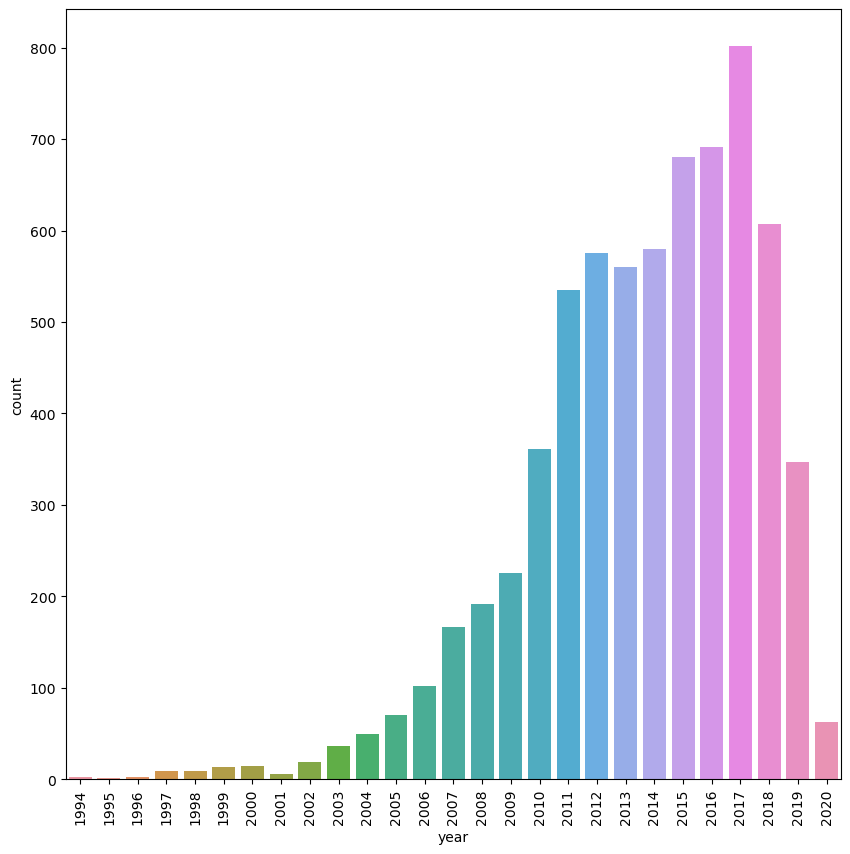

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='year',data=car_df)
plt.xticks(rotation=90)
plt.show()

#### ['km_driven']

In [22]:
car_df['km_driven'].unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   40000,   70000,   53000,
         80000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,    7500,   19000,   41000,   39000,   22000,
         47000,   72200,   49900,    9000,   11000,   95000,   18000,
         46100,   16000,    9654,   24300,   42163,    8000,   71000,
          9500,   36600,   14000,  120600,   86000,    7800,   31377,
         75000,   93

In [23]:
car_df['km_driven']

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8121     50000
8122     80000
8123    110000
8124    119000
8125    120000
Name: km_driven, Length: 6717, dtype: int64

#### ['fuel']

In [24]:
car_df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [25]:
car_df['fuel'].value_counts()

fuel
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: count, dtype: int64

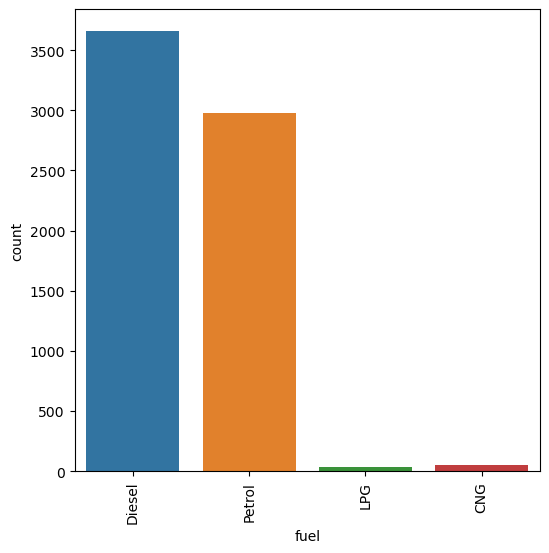

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='fuel',data=car_df)
plt.xticks(rotation=90)
plt.show()

In [27]:
car_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### ['seller_type']

In [28]:
car_df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [29]:
car_df['seller_type'].value_counts()

seller_type
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: count, dtype: int64

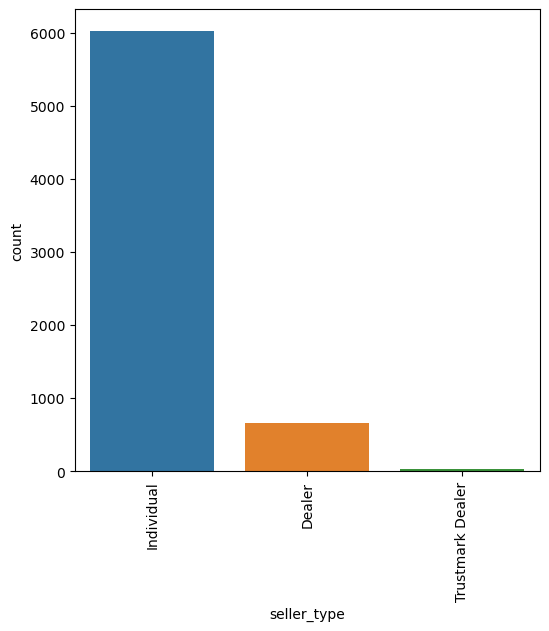

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='seller_type',data=car_df)
plt.xticks(rotation=90)
plt.show()

#### ['transmission']

In [31]:
car_df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
car_df['transmission'].value_counts()

transmission
Manual       6142
Automatic     575
Name: count, dtype: int64

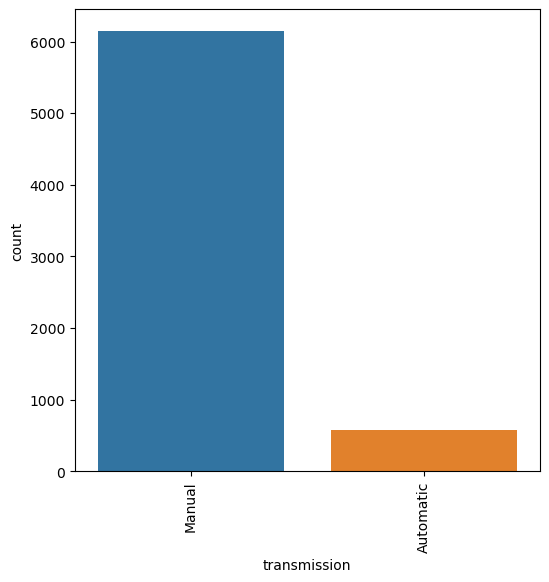

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='transmission',data=car_df)
plt.xticks(rotation=90)
plt.show()

#### ['owner']

In [34]:
car_df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [35]:
car_df['owner'].value_counts()

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

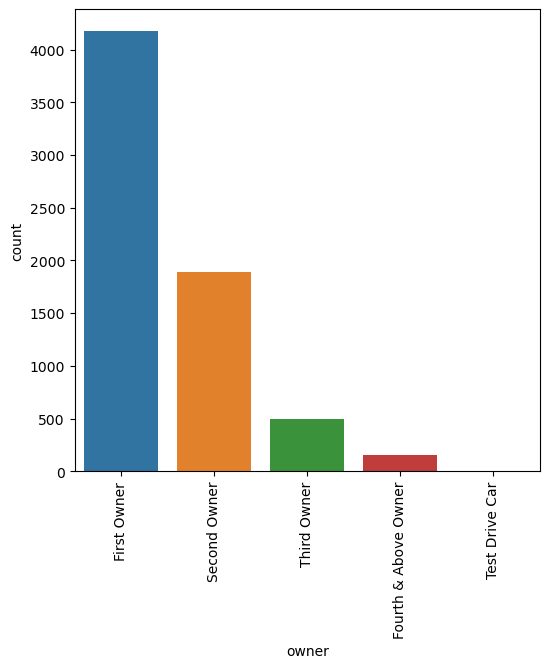

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x='owner',data=car_df)
plt.xticks(rotation=90)
plt.show()

#### ['mileage']

In [37]:
car_df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [38]:
car_df['mileage'] = car_df['mileage'].str.replace("kmpl","")
car_df['mileage'] = car_df['mileage'].str.replace("km/kg","")

In [39]:
car_df['mileage'] = car_df['mileage'].astype(float)

In [40]:
car_df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8121    18.90
8122    22.54
8123    18.50
8124    16.80
8125    19.30
Name: mileage, Length: 6717, dtype: float64

#### ['engine']

In [41]:
car_df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [42]:
car_df['engine'] = car_df['engine'].str.replace('CC','')

In [43]:
car_df['engine'] = car_df['engine'].astype(float)

#### ['max_power']

In [44]:
car_df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [45]:
# car_df.to_csv('ff.csv')

In [46]:
car_df['max_power'] = car_df['max_power'].str.replace('bhp',"")

In [47]:
car_df['max_power'].unique()

array(['74 ', '103.52 ', '78 ', '90 ', '88.2 ', '81.86 ', '57.5 ', '37 ',
       '67.1 ', '68.1 ', '108.45 ', '60 ', '73.9 ', '67 ', '82 ', '88.5 ',
       '46.3 ', '88.73 ', '64.1 ', '98.6 ', '88.8 ', '83.81 ', '83.1 ',
       '47.3 ', '73.8 ', '34.2 ', '35 ', '81.83 ', '40.3 ', '121.3 ',
       '138.03 ', '160.77 ', '117.3 ', '116.3 ', '83.14 ', '67.05 ',
       '168.5 ', '100 ', '120.7 ', '98.63 ', '175.56 ', '103.25 ',
       '171.5 ', '100.6 ', '174.33 ', '187.74 ', '170 ', '78.9 ',
       '88.76 ', '86.8 ', '108.495 ', '108.62 ', '93.7 ', '103.6 ',
       '98.59 ', '189 ', '67.04 ', '68.05 ', '58.2 ', '82.85 ', '81.80 ',
       '73 ', '120 ', '94.68 ', '160 ', '65 ', '155 ', '69.01 ',
       '126.32 ', '138.1 ', '83.8 ', '126.2 ', '98.96 ', '62.1 ', '86.7 ',
       '188 ', '214.56 ', '177 ', '280 ', '148.31 ', '254.79 ', '190 ',
       '177.46 ', '204 ', '141 ', '117.6 ', '241.4 ', '282 ', '150 ',
       '147.5 ', '108.5 ', '103.5 ', '183 ', '181.04 ', '157.7 ',
       '164.7 ', 

In [48]:
car_df['max_power'] = car_df['max_power'].astype(float)

In [49]:
car_df['max_power'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 ,
       171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,
        86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,
        83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   , 214.56 ,
       177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 , 204.   ,
       141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  , 108.5  ,
       103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,
        68.   ,  75.

In [50]:
car_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### ['torque']

In [51]:
car_df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8121                90Nm@ 3500rpm
8122        219.7Nm@ 1500-2750rpm
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
Name: torque, Length: 6717, dtype: object

In [52]:
car_df['torque'] = car_df['torque'].str.replace(',',"")

In [53]:
# def extract_numbers(text):
#     if pd.isna(text):  # Check if the entry is NaN
#         return pd.Series([None, None])
#     text = str(text)  # Convert to string in case it's not
#     numbers = re.findall(r'[\d.]+', text)
#     if len(numbers) >= 2:
#         return pd.Series([numbers[0], numbers[1]])
#     elif len(numbers) == 1:
#         return pd.Series([numbers[0], None])
#     else:
#         return pd.Series([None, None])

# # Apply the function to the DataFrame
# car_df[['torques', 'rpm']] = car_df['torque'].apply(extract_numbers)

# car_df



# Function to extract numbers and handle ranges
import re
# Function to extract numbers and calculate mean for ranges
def extract_numbers(text):
    if pd.isna(text):
        return pd.Series([None, None])
    
    # Extract numbers from the string
    numbers = re.findall(r'[\d.]+', text)
    if len(numbers) >= 2:
        first_number = numbers[0]
        second_number = numbers[1]
        
        # Check if there's a range and calculate the mean if so
        range_match = re.search(r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)', text)
        if range_match:
            low, high = map(float, range_match.groups())
            second_number = (low + high) / 2
        return pd.Series([first_number, second_number])
    elif len(numbers) == 1:
        return pd.Series([numbers[0], 0])
    else:
        return pd.Series([0, 0])

# Apply the function to the DataFrame
car_df[['torques', 'rpm']] = car_df['torque'].apply(extract_numbers)

car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torques,rpm
0,maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190,2000
1,skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250,2000.0
2,honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0,12.7,2700
3,hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4,2250.0
4,maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0,11.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90,3500
8122,hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,219.7,2125.0
8123,hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.7,4000
8124,hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24@ 1900-2750(kgm@ rpm),5.0,24,2325.0


In [54]:
car_df['torques'].unique()

array(['190', '250', '12.7', '22.4', '11.5', '113.75', '7.8', '59', '170',
       '160', '248', '78', '84', '115', '200', '62', '219.7', '114', '69',
       '172.5', '6.1', '114.7', '60', '90', '151', '104', '320', '145',
       '146', '343', '400', '138', '360', '380', '173', '111.7', '219.6',
       '112', '130', '205', '280', '99.04', '77', '110', '153', '113.7',
       '113', '101', '290', '120', '96', '135', '259.8', '259.9', '91',
       '96.1', '109', '202', '430', '347', '382', '620', '500', '550',
       '490', '177.5', '300', '260', '213', '224', '640', '95', '13.1',
       '71', '14.9', '117', '72', '11.4', '140', '134', '150', '340',
       '240', '330', '12.5', '111.8', '11.8', '135.4', '190.25', '20.4',
       '247', '223', '180', '195', '154.9', '114.73', '108', '190.24',
       '420', '100', '51', '132', '350', '218', '24', '13.5', '85',
       '74.5', '180.4', '230', '219.66', '245', '204', '14.3', '125',
       '172', '102', '8.5', '106.5', '108.5', '144.15', '99', '1

In [55]:
car_df['torques'].value_counts()

torques
200      595
190      550
90       355
114      227
113      176
        ... 
22.9       1
121        1
347        1
23.6       1
436.4      1
Name: count, Length: 244, dtype: int64

In [56]:
car_df['rpm'].unique()

array(['2000', 2000.0, '2700', 2250.0, '4500', '4000', '2500', 2100.0,
       '2250', '3500', 3550.0, '1750', '3000', 2125.0, '4850', 2200.0,
       '4600', '4800', 2400.0, 2625.0, '4400', 2300.0, 2375.0, 2500.0,
       2975.0, '3750', '3800', '4200', '4250', '1500', 2275.0, 2325.0,
       '1900', 4400.0, '4300', 3125.0, 1700.0, 2600.0, 0, '1600', '2750',
       '4700', 2875.0, 1300.0, '1740', 3650.0, '3200', '4386', 2750.0,
       2525.0, 1900.0, 1470.0, 1800.0, 3275.0, '5000', '1800', 1950.0,
       '3600', 1820.0, '38.7', '4388', 2150.0, 1650.0, '2600', '4100',
       '4750', 2950.0, '3300', 1750.0, '3100', '3400', '11.2', 3775.0,
       '1850', 2225.0, 1875.0, '2650', 3000.0, 3200.0, 1500.0, 2800.0,
       4000.0, 3325.0, '2800', 1462.5, '2200', 3175.0, 3100.0, '2400',
       '21800', 2050.0, 2340.0, '3700'], dtype=object)

In [57]:
car_df = car_df.dropna(subset=['rpm'])

In [58]:
car_df['rpm'].unique()

array(['2000', 2000.0, '2700', 2250.0, '4500', '4000', '2500', 2100.0,
       '2250', '3500', 3550.0, '1750', '3000', 2125.0, '4850', 2200.0,
       '4600', '4800', 2400.0, 2625.0, '4400', 2300.0, 2375.0, 2500.0,
       2975.0, '3750', '3800', '4200', '4250', '1500', 2275.0, 2325.0,
       '1900', 4400.0, '4300', 3125.0, 1700.0, 2600.0, 0, '1600', '2750',
       '4700', 2875.0, 1300.0, '1740', 3650.0, '3200', '4386', 2750.0,
       2525.0, 1900.0, 1470.0, 1800.0, 3275.0, '5000', '1800', 1950.0,
       '3600', 1820.0, '38.7', '4388', 2150.0, 1650.0, '2600', '4100',
       '4750', 2950.0, '3300', 1750.0, '3100', '3400', '11.2', 3775.0,
       '1850', 2225.0, 1875.0, '2650', 3000.0, 3200.0, 1500.0, 2800.0,
       4000.0, 3325.0, '2800', 1462.5, '2200', 3175.0, 3100.0, '2400',
       '21800', 2050.0, 2340.0, '3700'], dtype=object)

In [59]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torques,rpm
0,maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190,2000
1,skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250,2000.0
2,honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0,12.7,2700
3,hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.4,2250.0
4,maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0,11.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90,3500
8122,hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,219.7,2125.0
8123,hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.7,4000
8124,hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24@ 1900-2750(kgm@ rpm),5.0,24,2325.0


In [60]:
car_df.drop(columns='torque',inplace=True)

In [61]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torques,rpm
0,maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190,2000
1,skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250,2000.0
2,honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,12.7,2700
3,hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,22.4,2250.0
4,maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90,3500
8122,hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,219.7,2125.0
8123,hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.7,4000
8124,hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,24,2325.0


In [62]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
 12  torques        6717 non-null   object 
 13  rpm            6717 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 787.1+ KB


In [63]:
car_df.torques = car_df.torques.astype(float)
car_df.rpm = car_df.rpm.astype(float)

In [64]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
 12  torques        6717 non-null   float64
 13  rpm            6717 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 787.1+ KB


In [65]:
# Convert the categorical columns into the numerical format
encoder = LabelEncoder()

In [66]:
car_df['name'] = encoder.fit_transform(car_df['name'])

car_df['fuel'] = encoder.fit_transform(car_df['fuel'])

car_df['seller_type'] = encoder.fit_transform(car_df['seller_type'])

car_df['transmission'] = encoder.fit_transform(car_df['transmission'])

car_df['owner'] = encoder.fit_transform(car_df['owner'])

In [67]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torques,rpm
0,19,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,190.0,2000.0
1,26,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,250.0,2000.0
2,10,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,12.7,2700.0
3,11,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,22.4,2250.0
4,19,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,11.5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,19,2013,260000,50000,3,1,1,2,18.90,998.0,67.10,5.0,90.0,3500.0
8122,11,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,219.7,2125.0
8123,11,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,5.0,113.7,4000.0
8124,11,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,5.0,24.0,2325.0


In [68]:
X = car_df.drop(columns='selling_price',axis=1)
y = car_df.selling_price

In [69]:
scaler = StandardScaler()

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor,LGBMRegressor,CatBoostRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 5373, number of used features: 13
[LightGBM] [Info] Start training from score 525948.416155
Learning rate set to 0.053402
0:	learn: 500380.0452934	total: 332ms	remaining: 5m 32s
1:	learn: 485690.9169548	total: 339ms	remaining: 2m 48s
2:	learn: 469066.7720428	total: 349ms	remaining: 1m 55s
3:	learn: 452387.2662461	total: 363ms	remaining: 1m 30s
4:	learn: 437839.3224612	total: 369ms	remaining: 1m 13s
5:	learn: 424653.5375214	total: 387ms	remaining: 1m 4s
6:	learn: 412719.5379383	total: 399ms	remaining: 56.6s
7:	learn: 399985.9536284	total: 410ms	remaining: 50.9s
8:	learn: 388362.0906633	total: 422ms	remaining: 46.5s
9:	learn: 377603.7368392	total: 429ms	remaining: 42.5s
10:	l

In [73]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor","GradientBoostingRegressor","LGBMRegressor",'CatBoostRegressor'],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,174358.310408,1.180858e+11,343636.129136,0.604398
Lasso,174357.632050,1.180858e+11,343636.096670,0.604398
Ridge,174343.747067,1.180890e+11,343640.818758,0.604387
SVR,279540.354789,3.100681e+11,556837.608726,-0.038767
Decision Tree Regressor,101595.982639,3.886276e+10,197136.401530,0.869805
Random Forest Regressor,78553.786324,2.306367e+10,151867.262535,0.922734
GradientBoostingRegressor,86374.985426,2.445204e+10,156371.486501,0.918083
LGBMRegressor,81506.599859,2.558632e+10,159957.258404,0.914283
CatBoostRegressor,72884.193651,1.830959e+10,135312.943730,0.938661


In [ ]:
# Define the model
model = CatBoostRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [500, 1000, 2000],
    'bagging_temperature': [0.1, 0.5, 1],
    'rsm': [0.8, 1]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
